# Youtube titles analysis 🎥
The purpose of this project is to analyze popular youtuber's titles and to find patterns that might be considered as guidelines for writing good titles. Database with around 3K titles scraped from around 20 successful youtubers that have at least +120K subscribers. Most channels have commentary/tech/programming content.

## Install and import necessary libraries

### Seaborn 
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

### Pandas
pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

### Matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

In [ ]:
%pip install seaborn pandas matplotlib nltk


In [2]:
import sys
print(sys.executable)

/opt/homebrew/opt/python@3.9/bin/python3.9


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
from collections import Counter 
import nltk
import string 

In [62]:
class Visualizer:
  def __init__(self, x,y, palette=None, color=None):
    self.x = x
    self.y = y
    self.figsize = (self.x, self.y)
    self.palette = sns.color_palette(palette, as_cmap=True)
    self.color = color

  def setup_figure(self):
    plt.figure(figsize=self.figsize)

  def scatterplot(
      self, 
      data, 
      x, 
      y, 
      hue=None, 
      size=None, 
      title='Title', 
      fontsize=18, 
      x_axis = 'X axis',
      y_axis = 'Y xis',
      sizes=None,
      ):
    self.setup_figure()
    if self.color:
        ax = sns.scatterplot(data=data, x=x, y=y, hue=hue, size=size, sizes=sizes, color=self.color)
    else:
        ax = sns.scatterplot(data=data, x=x, y=y, hue=hue, size=size, sizes=sizes, palette=self.palette)
    self.format_axes(ax, title, x_axis, y_axis, fontsize)

    
  def barplot(
      self, 
      data, 
      x, 
      y, 
      hue=None, 
      title='Title', 
      fontsize=18, 
      x_axis = 'X axis',
      y_axis = 'Y xis',
      group_by = None
      ):
    self.setup_figure()
    if group_by:
      data = data.groupby(group_by).agg({"views": "mean"}).reset_index()
    color_or_palette = self.color if self.color else self.palette
    ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=color_or_palette)
    self.format_axes(ax, title, x_axis, y_axis, fontsize)
    plt.xticks([0,1,2],["No QM","One QM","Two QMs"])

  def format_axes(self, ax, title, x_axis, y_axis, fontsize):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
    plt.title(title, fontsize=fontsize)
    plt.xlabel(x_axis, fontsize=10)
    plt.ylabel(y_axis, fontsize=10)

In [52]:
class Title_Analyzer:
    def __init__(self, data, visualizer):
        self.data = data
        self.visualizer = visualizer

    def popularity_char_plot(self):
        """
        Creates a scatterplot that analyzes relationship between number of characters and popularity 

         Parameters:
        - data: DataFrame containing the YouTube titles dataset.
        - x (str): Column name for the x-axis, in this case, 'title_length'.
        - y (str): Column name for the y-axis, in this case, 'views'.
        - hue (str): Column name to determine color coding, here 'word_count'.
        - title (str): Title of the plot.

        The method utilizes the Visualizer class's scatterplot method based on seaborn library

        """

        self.visualizer.scatterplot(self.data, x="title_length", y="views", hue="word_count", title="Title Length vs Views", size="word_count", x_axis = 'Title Length', y_axis = 'Number of Views')
    
    def easy_reading_score(self):
        """
        Creates a scatterplot that analyzes relationship between Flesch Reading Ease Score and popularity 

         Parameters:
        - data: DataFrame containing the YouTube titles dataset.
        - x (str): Column name for the x-axis, in this case, "flesch_reading_ease".
        - y (str): Column name for the y-axis, in this case, 'views'.
        - hue (str): Column name to determine color coding, here "stopword_count".
        - title (str): Title of the plot.

        The method utilizes the Visualizer class's scatterplot method based on seaborn library

        """
        self.visualizer.scatterplot(self.data, x="flesch_reading_ease", y="views", hue="stopword_count", size="stopword_count", sizes=(10, 200), title = "Flesch Readability Score", x_axis = 'Flesch Reading Score', y_axis = 'Average Number of Views')

    def sentiment_analysis(self):
        """
        Creates a scatterplot that analyzes relationship between Sentiment Analysis of Titles and Average Views 

         Parameters:
        - data: DataFrame containing the YouTube titles dataset.
        - x (str): Column name for the x-axis, in this case, "flesch_reading_ease".
        - y (str): Column name for the y-axis, in this case, 'views'.
        - hue (str): Column name to determine color coding, here "stopword_count".
        - title (str): Title of the plot.

        The method utilizes the Visualizer class's scatterplot method based on seaborn library

        """
        self.visualizer.scatterplot(self.data, x=data.sentiment_polarity, y=data.views, hue="has_qmark", title="Total Views by Sentiment Analysis", x_axis="Sentiment Behind the Title", y_axis="View Count")
        

In [63]:
data = pd.read_csv("data_3.csv")
viz = Visualizer(18,10, "cubehelix")
title_analyzer = Title_Analyzer(data, viz)

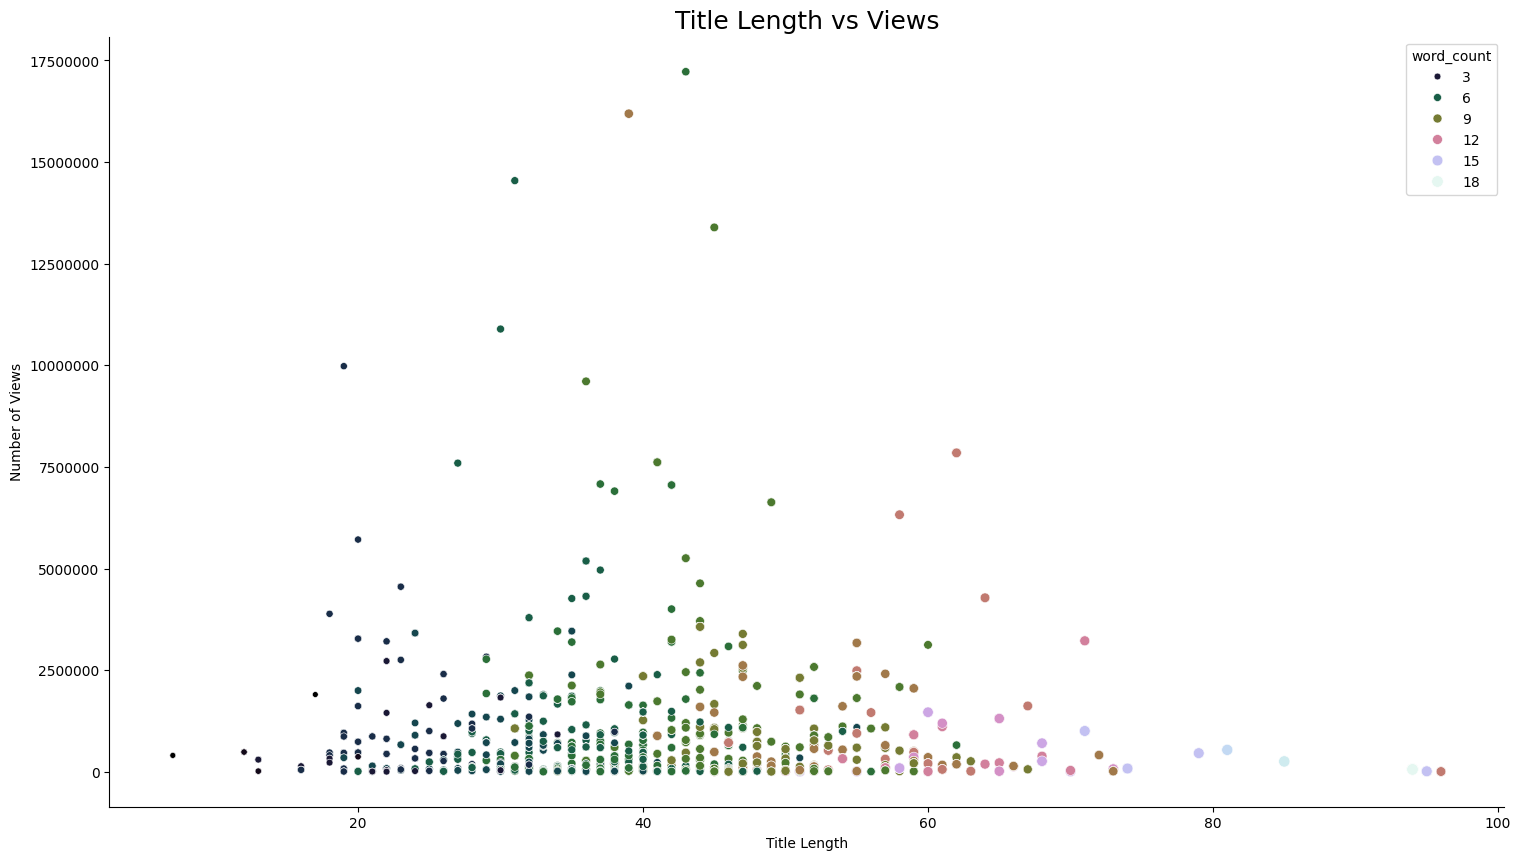

In [64]:
title_analyzer.popularity_char_plot()

In [65]:
viz_big = Visualizer(20,10, palette="icefire")
title_analyzer = Title_Analyzer(data,viz_big)

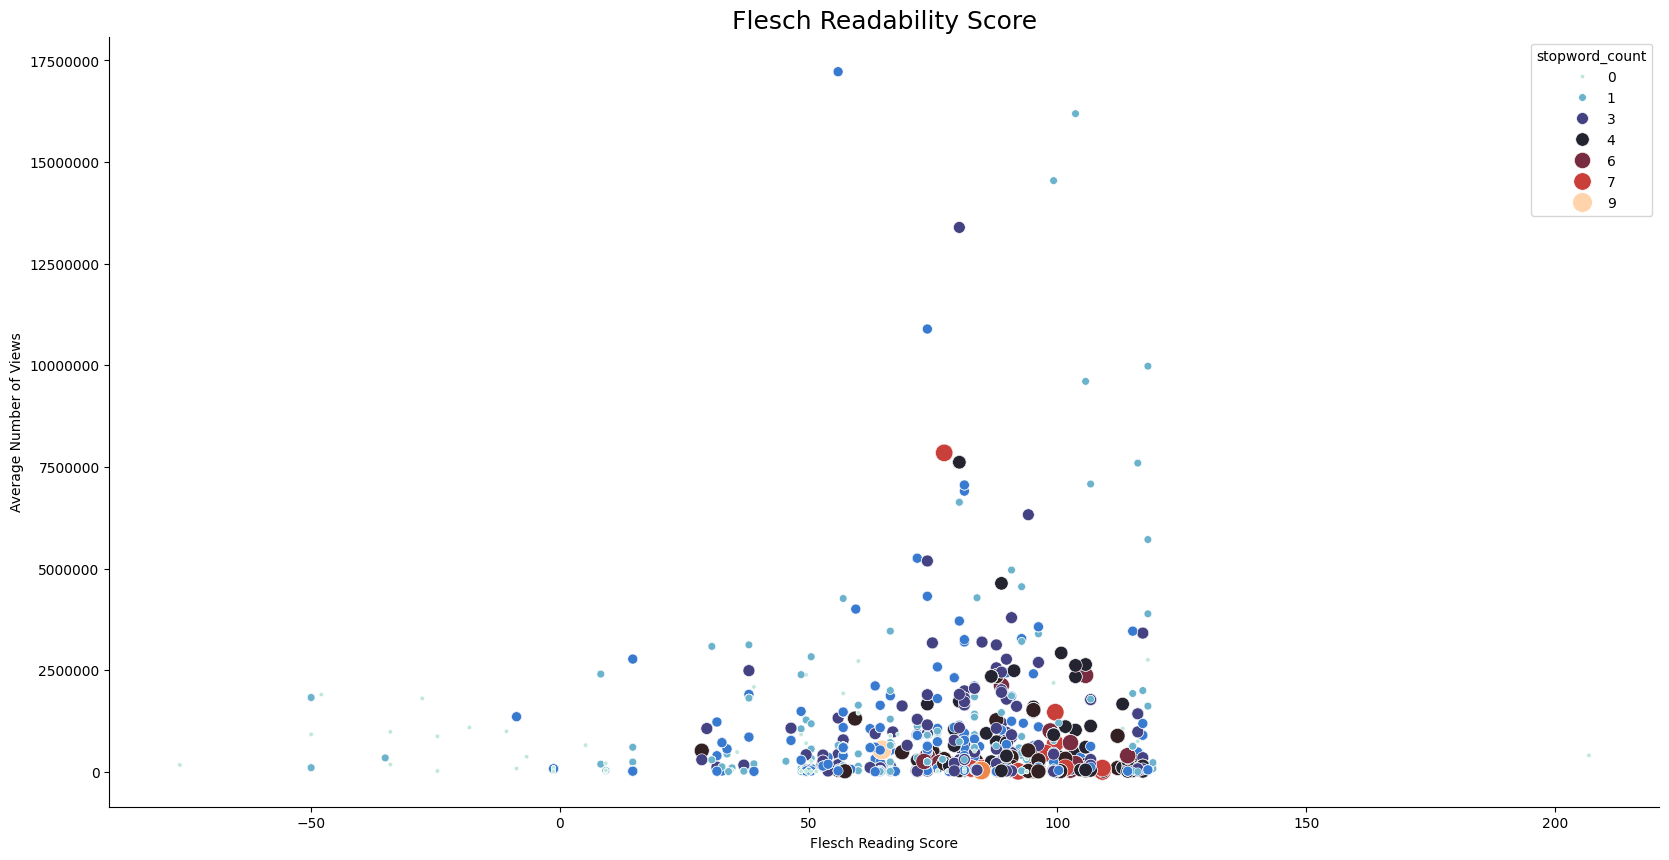

In [66]:
title_analyzer.easy_reading_score()

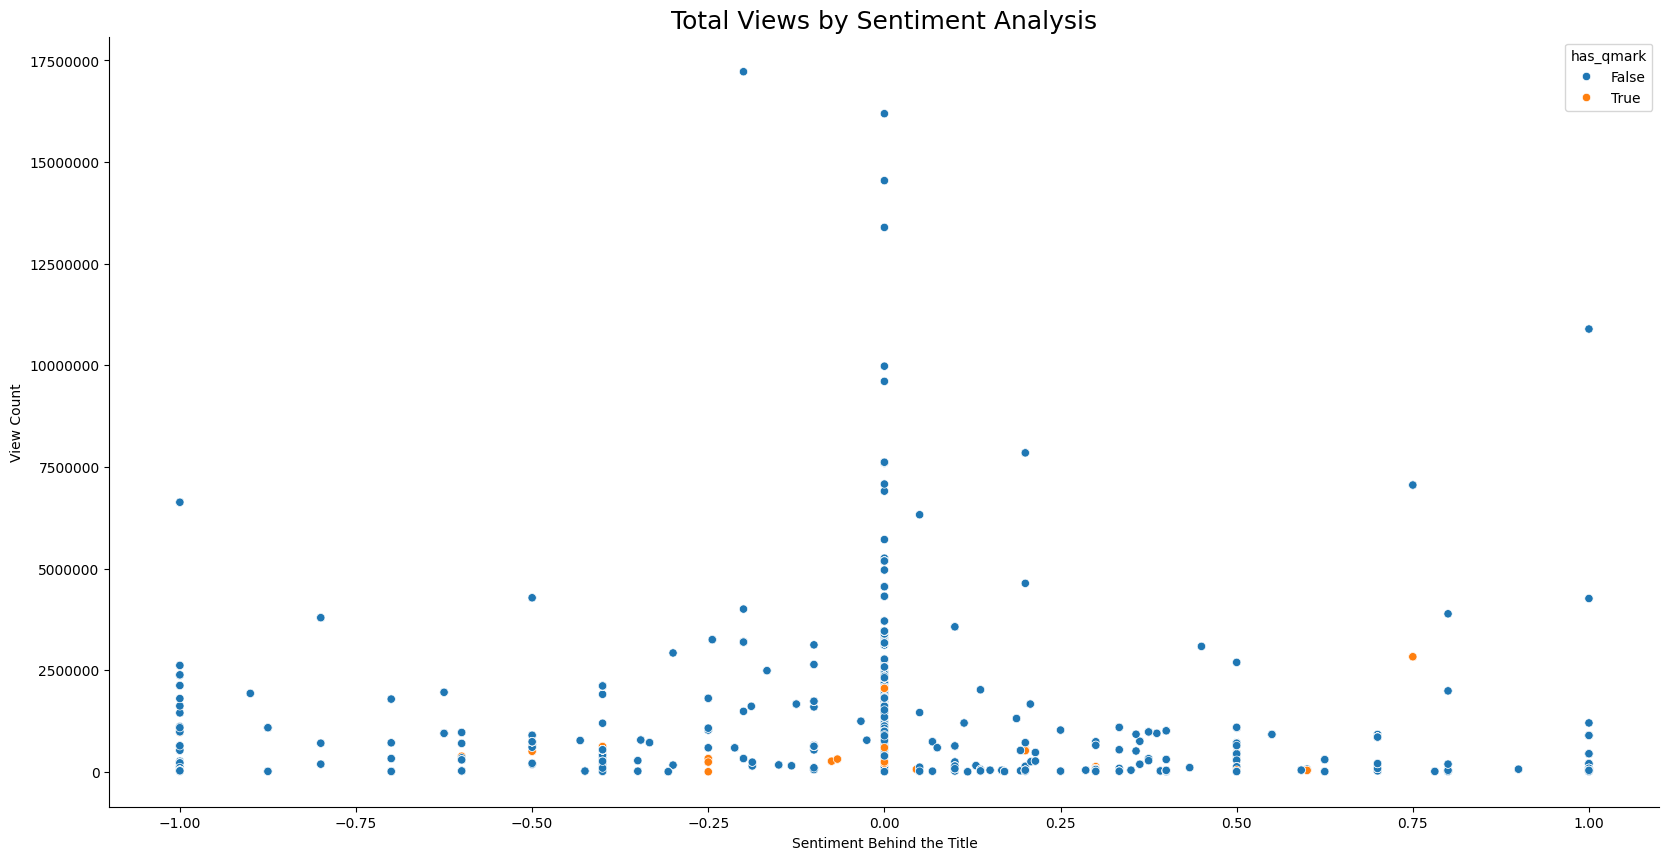

In [67]:
viz_color = Visualizer(20,10, color="#7d5189")
title_analyzer = Title_Analyzer(data,viz_color)
title_analyzer.sentiment_analysis()

Text(0, 0.5, 'Average Views')

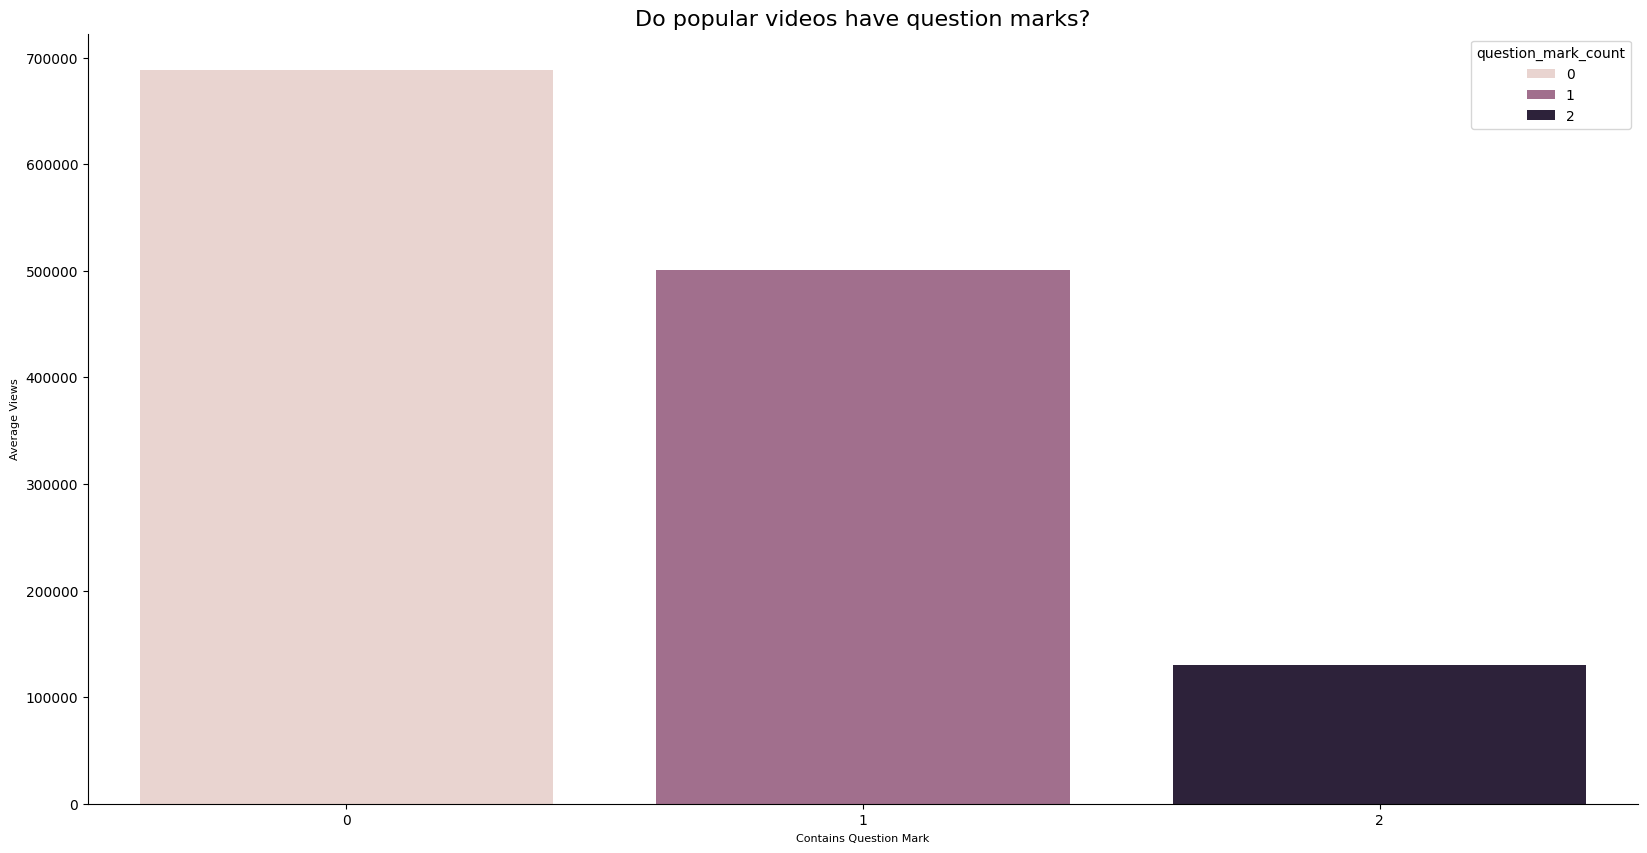

In [68]:
# Do popular videos have question marks?

data_qm = data.groupby("question_mark_count").agg({"views": "mean"}).reset_index()

plt.figure(figsize=(20,10))
ax = sns.barplot(data=data_qm, x="question_mark_count", y="views", hue="question_mark_count")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Do popular videos have question marks?", fontsize=16)
plt.xlabel("Contains Question Mark", fontsize=8)
plt.ylabel("Average Views", fontsize=8)
plt.xticks([0,1,2],["No QM","One QM","Two QMs"])


([<matplotlib.axis.XTick at 0x2a3fb83d0>,
 [Text(0, 0, 'No QM'), Text(1, 0, 'Has QM')])

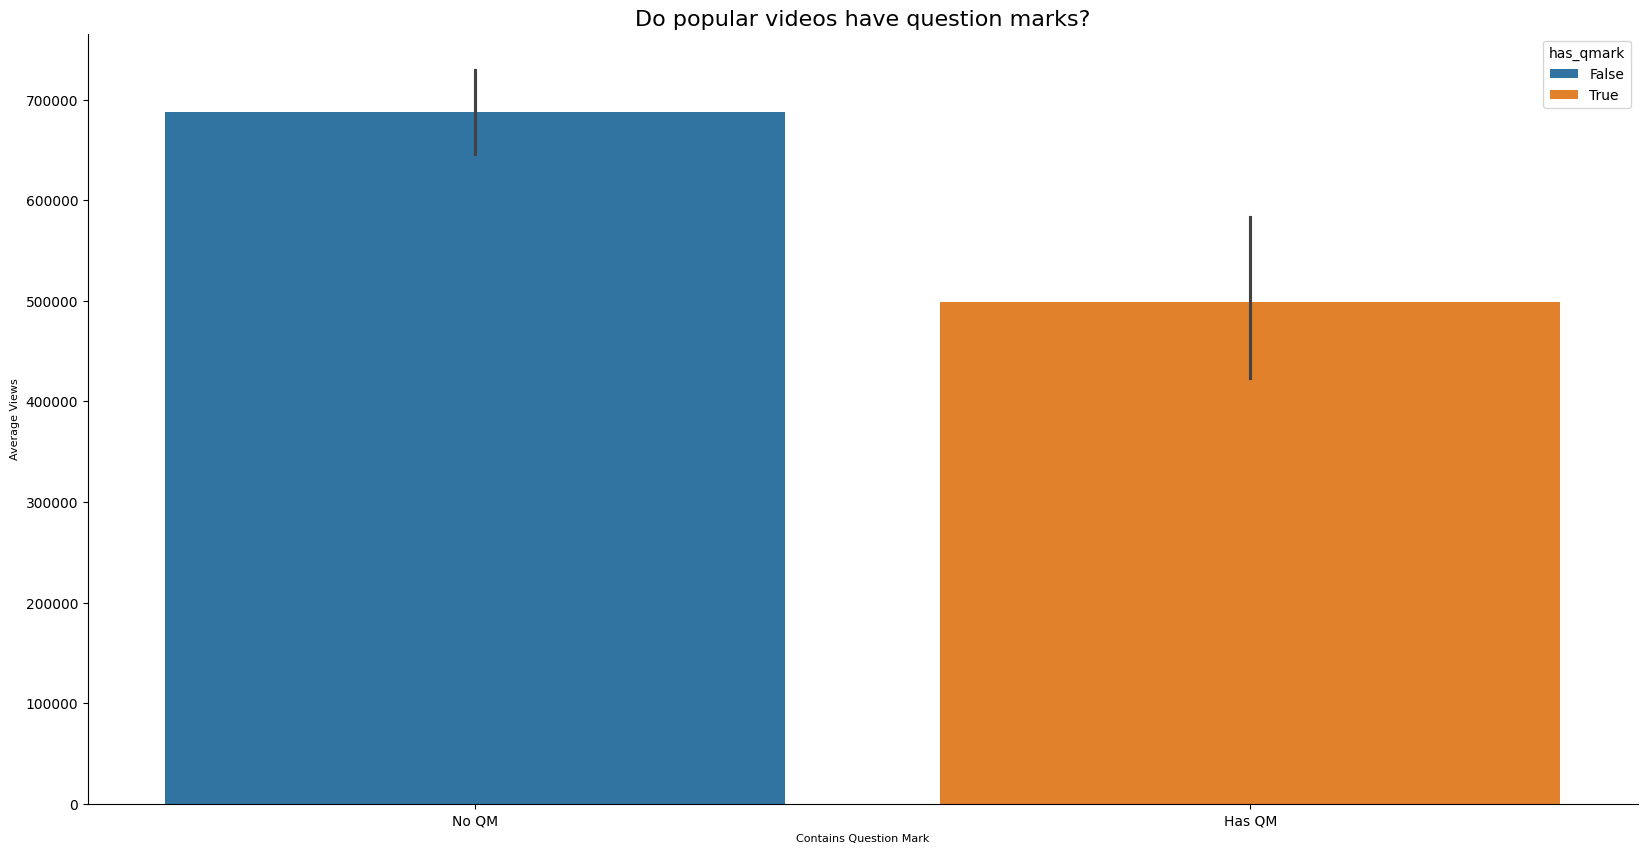

In [10]:
data_has_qm = data.groupby("has_qmark").agg({"views": "mean"}).reset_index()

plt.figure(figsize=(20,10))
ax = sns.barplot(data=data_has_qm, x=data.has_qmark, y=data.views, hue=data.has_qmark)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Do popular videos have question marks?", fontsize=16)
plt.xlabel("Contains Question Mark", fontsize=8)
plt.ylabel("Average Views", fontsize=8)
plt.xticks([0,1],["No QM","Has QM"])

Text(0, 0.5, 'Average Views')

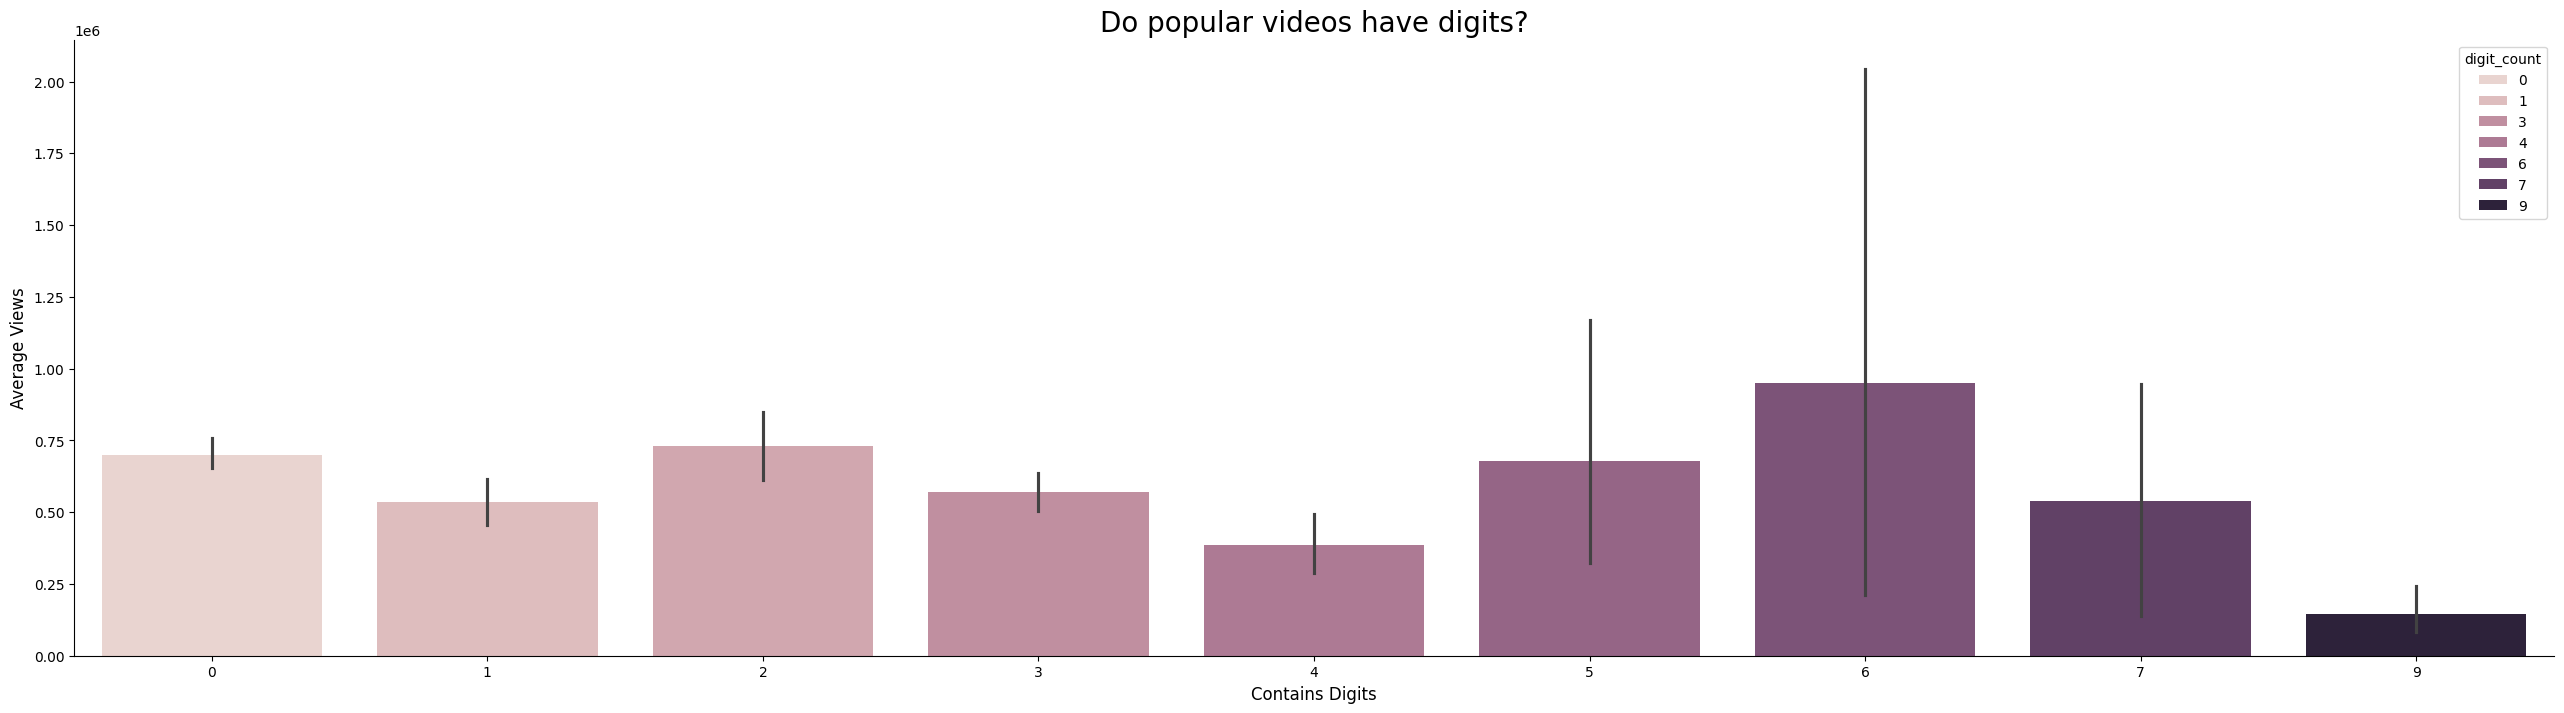

In [11]:
# Do popular videos have digits?
data_digits = data.groupby("digit_count").agg({"views": "mean"}).reset_index()

plt.figure(figsize=(32,8))
ax = sns.barplot(data=data_digits, x=data.digit_count, y=data.views, hue=data.digit_count)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Do popular videos have digits?", fontsize=20)
plt.xlabel("Contains Digits", fontsize=12)
plt.ylabel("Average Views", fontsize=12)

([<matplotlib.axis.XTick at 0x2a4b08dc0>,
 [Text(0, 0, 'No Dollar Sign'), Text(1, 0, 'Has Dollar Sign')])

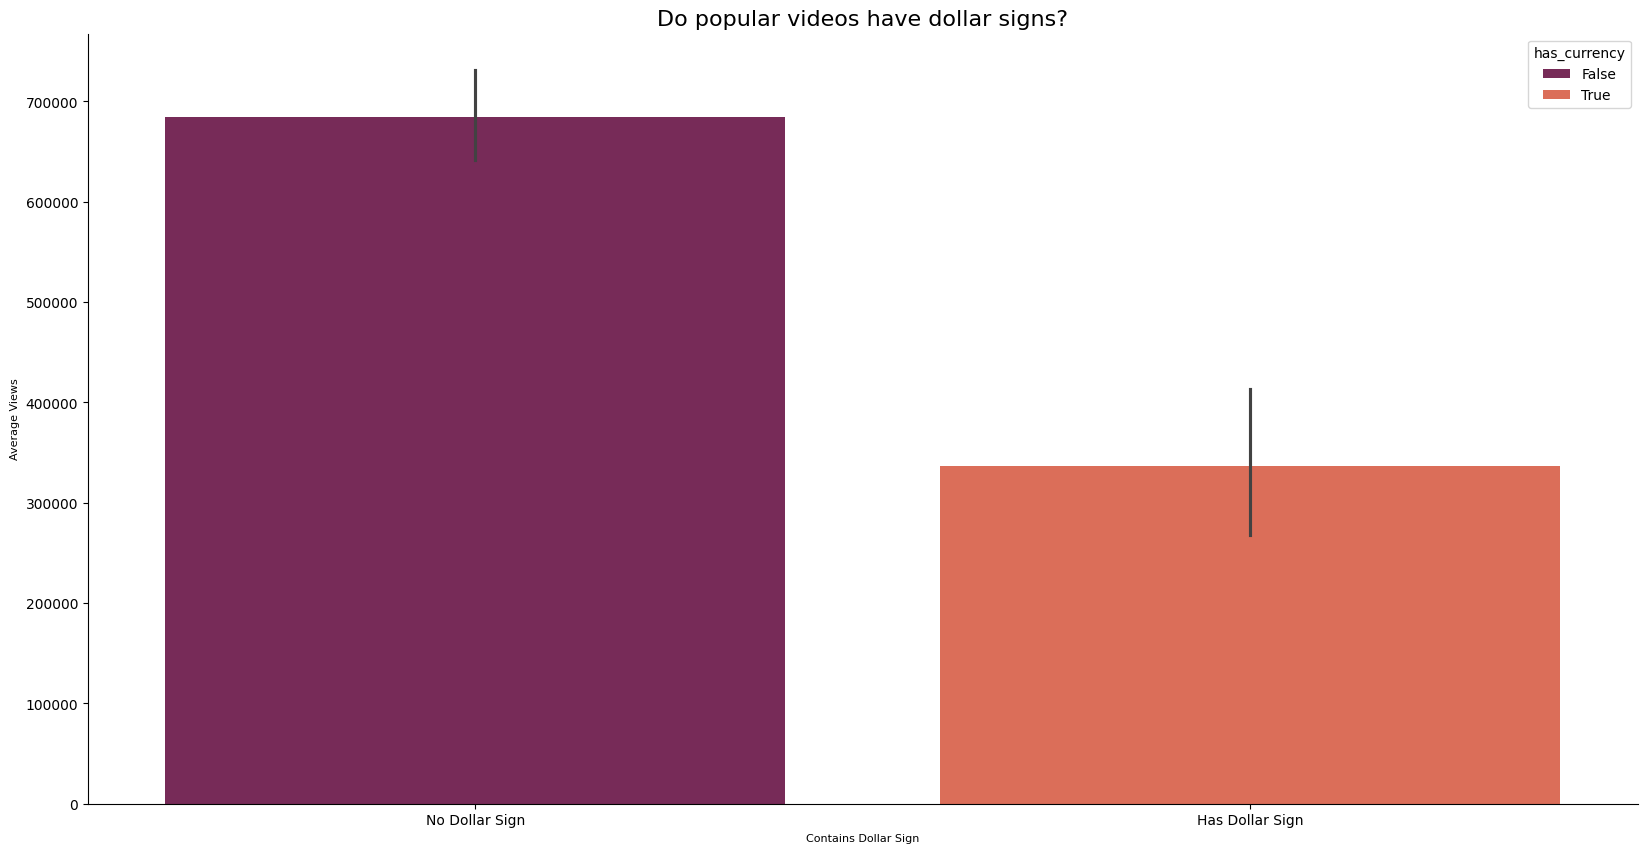

In [12]:
data_has_currency = data.groupby("has_currency").agg({"views": "mean"}).reset_index()

plt.figure(figsize=(20,10))
ax = sns.barplot(data=data_has_currency, x=data.has_currency, y=data.views, hue=data.has_currency, palette="rocket")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Do popular videos have dollar signs?", fontsize=16)
plt.xlabel("Contains Dollar Sign", fontsize=8)
plt.ylabel("Average Views", fontsize=8)
plt.xticks([0,1],["No Dollar Sign","Has Dollar Sign"])

([<matplotlib.axis.XTick at 0x2a4b8e6d0>,
 [Text(0, 0, 'No Digits'), Text(1, 0, 'Has Digits')])

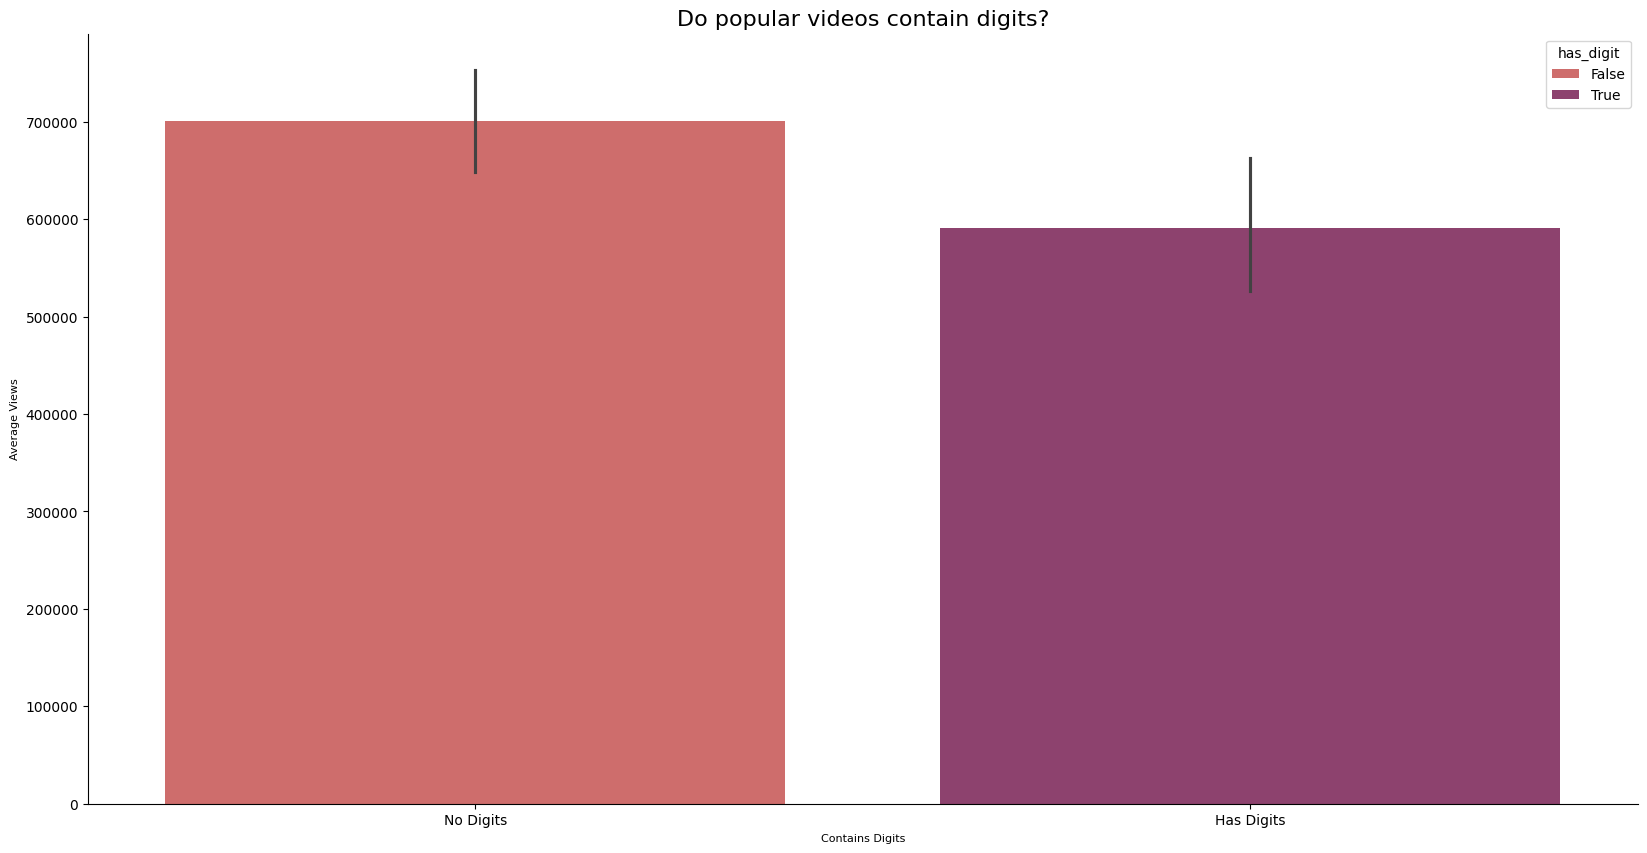

In [13]:
data_has_digit = data.groupby("has_digit").agg({"views": "mean"}).reset_index()

plt.figure(figsize=(20,10))
ax = sns.barplot(data=data_has_digit, x=data.has_digit, y=data.views, hue=data.has_digit, palette="flare")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Do popular videos contain digits?", fontsize=16)
plt.xlabel("Contains Digits", fontsize=8)
plt.ylabel("Average Views", fontsize=8)
plt.xticks([0,1],["No Digits","Has Digits"])

Text(0, 0.5, 'Average Views')

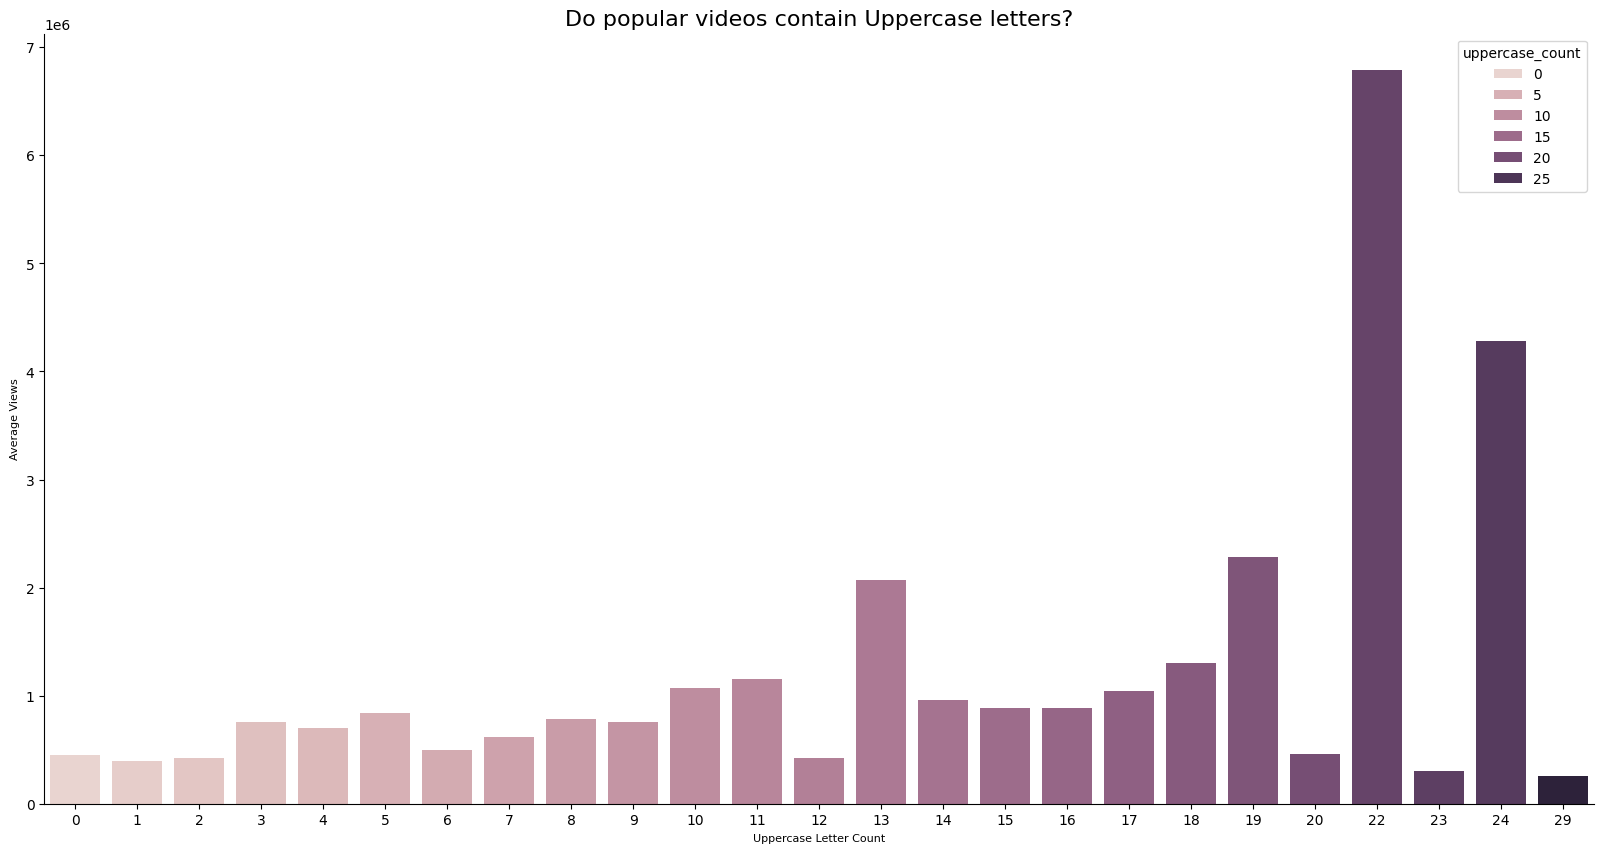

In [14]:
# Do popular videos Contain more UpperCase Letter?
data_upper = data.groupby("uppercase_count").agg({"views": "mean"}).reset_index()
plt.figure(figsize=(20,10)) 
ax = sns.barplot(data=data_upper, x="uppercase_count", y="views", hue="uppercase_count")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Do popular videos contain Uppercase letters?", fontsize=16)
plt.xlabel("Uppercase Letter Count", fontsize=8)
plt.ylabel("Average Views", fontsize=8)

Text(0, 0.5, 'Average Views')

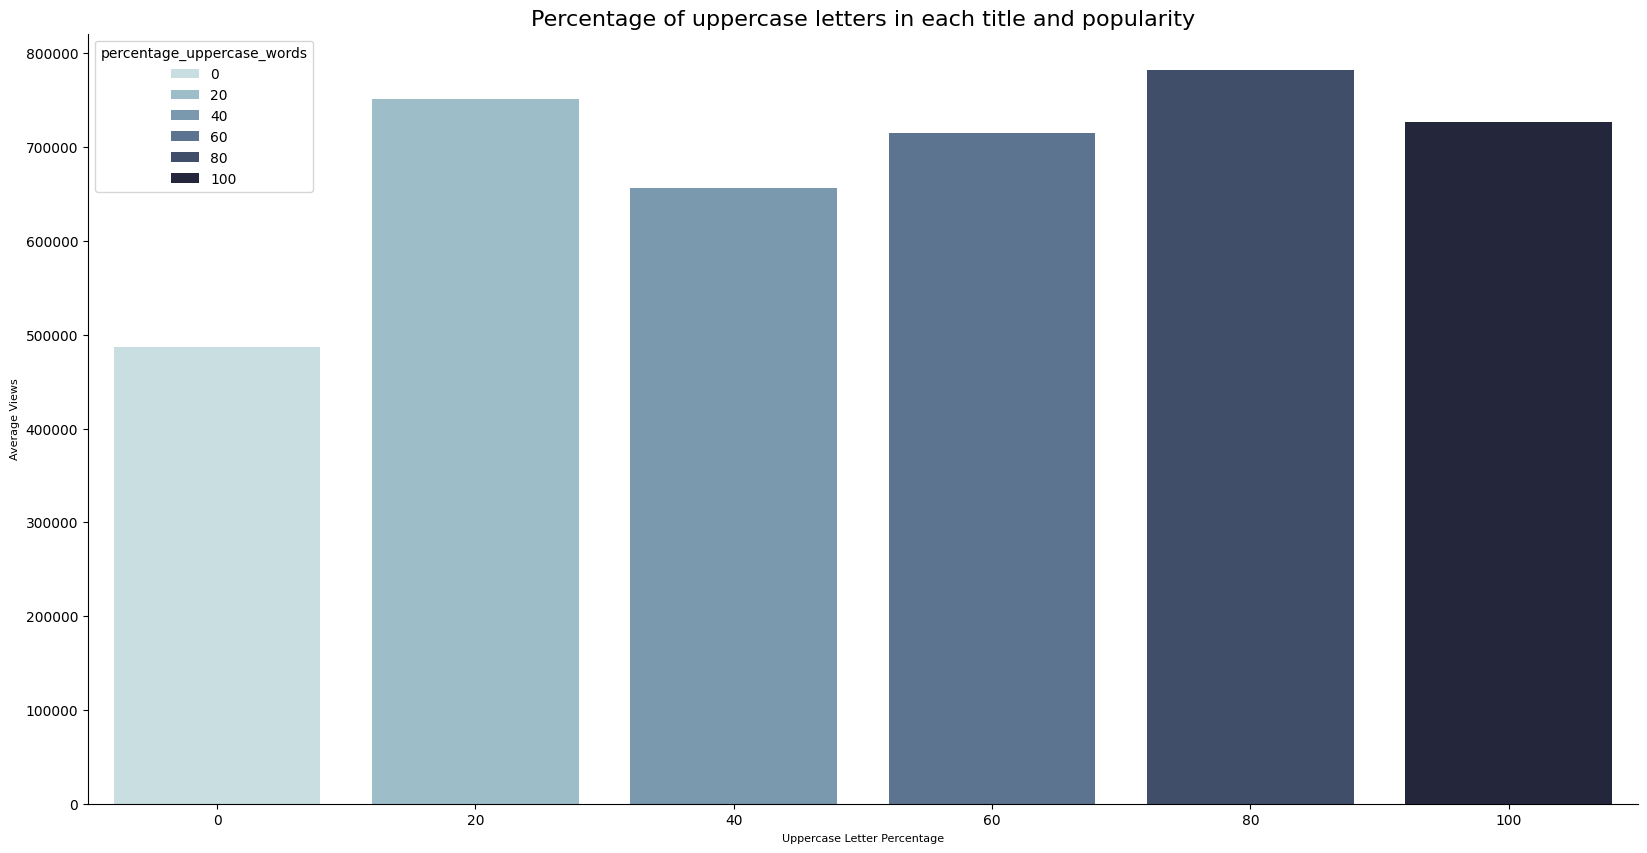

In [15]:
# Do popular videos Contain more UpperCase Letter?
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
data_upper = data.groupby("percentage_uppercase_words").agg({"views": "mean"}).reset_index()
plt.figure(figsize=(20,10)) 
ax = sns.barplot(data=data_upper, x="percentage_uppercase_words", y="views", hue="percentage_uppercase_words", palette=cmap)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Percentage of uppercase letters in each title and popularity", fontsize=16)
plt.xlabel("Uppercase Letter Percentage", fontsize=8)
plt.ylabel("Average Views", fontsize=8)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/majagoracinska/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


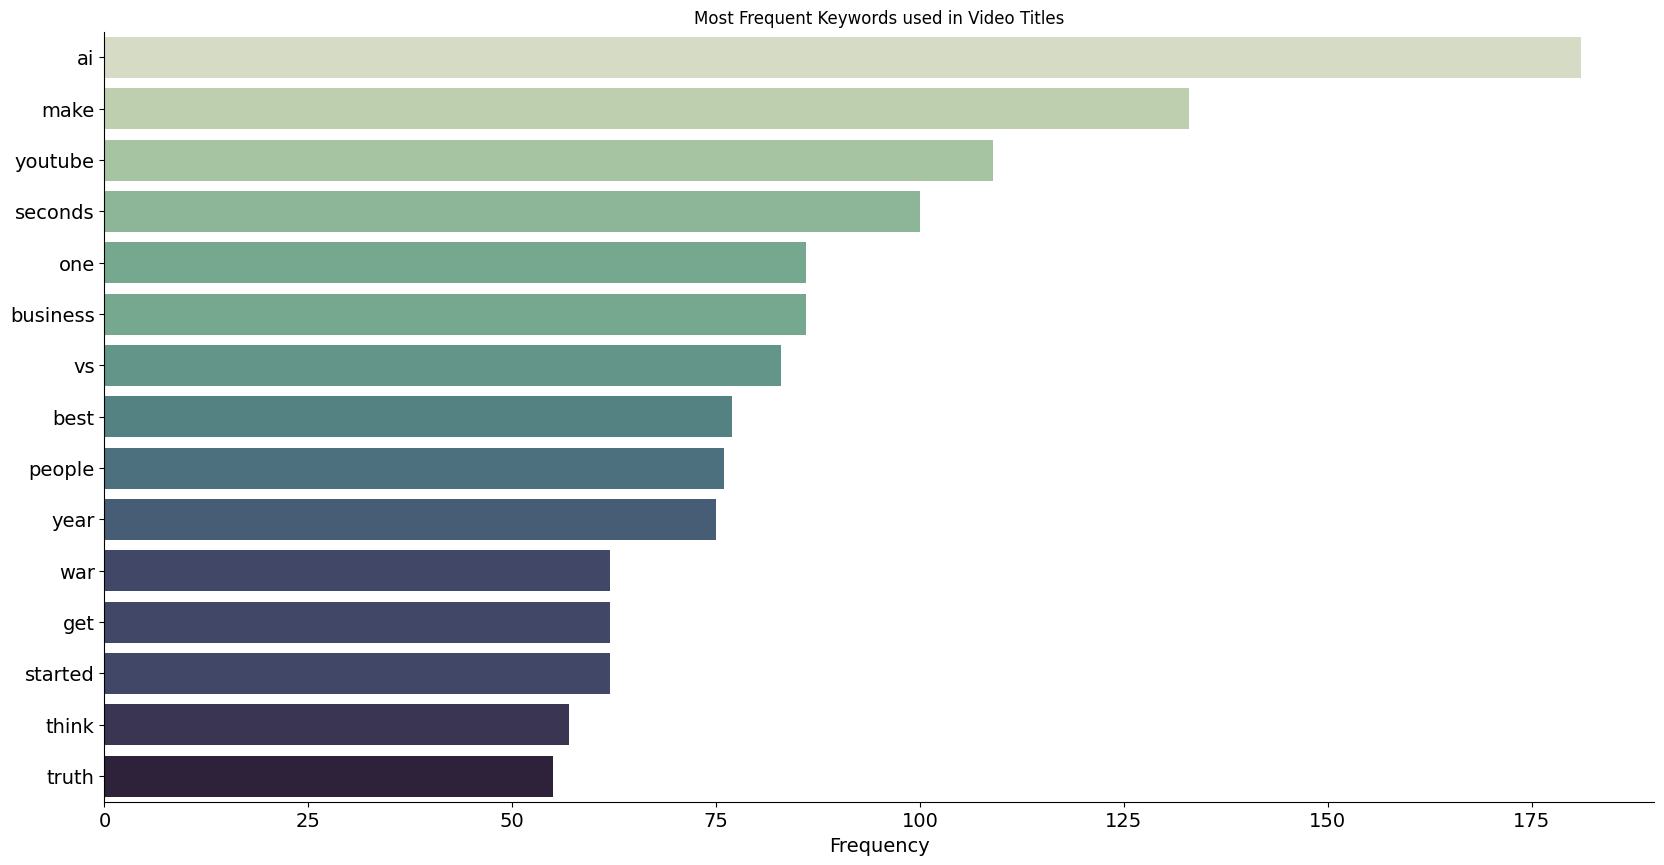

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
punctuation = string.punctuation

palette = sns.cubehelix_palette(12, start=.5, rot=-.75, reverse=True)
text = " ".join(data['title'])
text = text.lower()
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stop_words]
text = [t for t in text if not t.isdigit()]

x = [_[0] for _ in Counter(text).most_common(15)]
y = [_[1] for _ in Counter(text).most_common(15)]


plt.figure(figsize=(20,10));
ax = sns.barplot(x=y, y=x, palette=palette, hue=y, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Video Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

/var/folders/_z/y_j7fk893kx_p5sy7j6p2m3m0000gn/T/ipykernel_45200/4134626769.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=y[:20], y=x[:20], palette=palette)


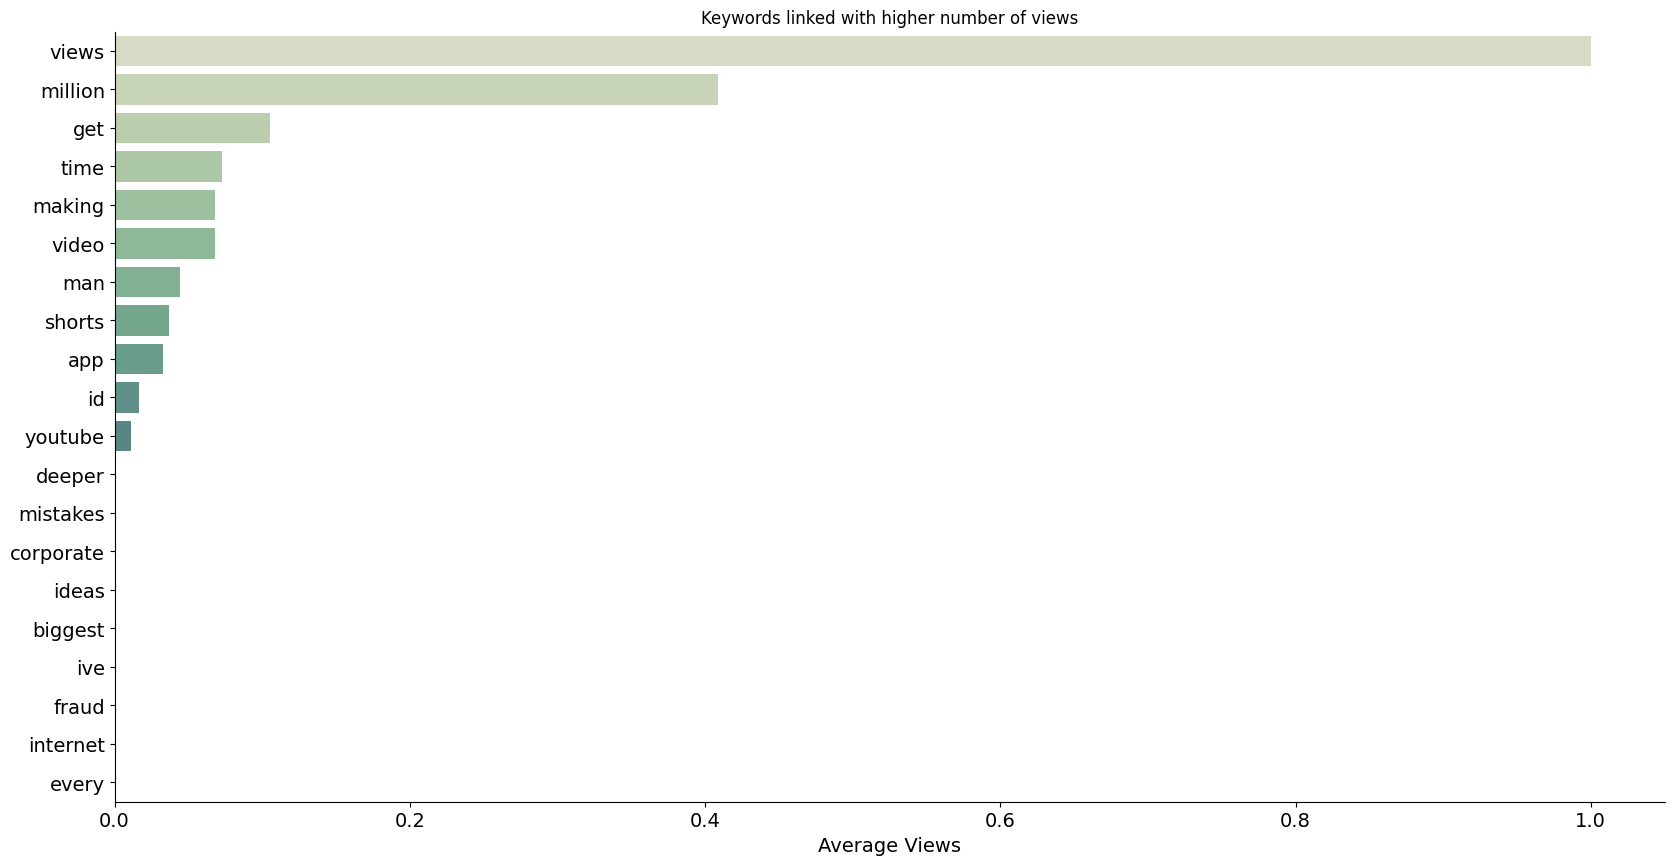

In [21]:
top100 = Counter(text).most_common(100)

for t in top100:
    t = t[0]
    data[t] = data['title'].apply(lambda x : 1 if t.lower() in x.lower() else 0)
    
views_by_words = {}
for t in top100:
    t = t[0]
    doc = data.groupby(t).agg({"views" : "mean"}).to_dict()['views']
    if 1 in doc:
        views_by_words[t] = doc[1]
        
views_by_words = {k: v for k, v in sorted(views_by_words.items(), key=lambda item: item[1])}
x = [_ for _ in list(views_by_words.keys())][::-1]
y = [_ for _ in list(views_by_words.values())][::-1]
palette = sns.cubehelix_palette(n_colors=20, start=.5, rot=-.75, reverse=False)

plt.figure(figsize=(20,10));
ax = sns.barplot(x=y[:20], y=x[:20], palette=palette)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Keywords linked with higher number of views");
plt.xlabel("Average Views", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);
plt.ticklabel_format(style='plain', axis='x',useOffset=False)